# Proyecto individual - Hackaton Machine Learning

## Este proyecto tendra 4 fases:

### 1 - Analisis exploratorio

### 2 - Limpieza de datos 

### 3 - implementacion de modelo predictivo

### 4 - Testing

##                                  Analisis Exploratorio

In [510]:
## Importamos librerias

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [511]:
## Importamos la data de entrenamiento

data = pd.read_csv('.\Housing Dreams\house_train_raw.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [512]:
#Chequeamos la dimension del dataframe
data.shape

(1460, 81)

###### There are 1460 rows and 81 columns in this dataset

In [513]:
# Chequeamos los datos estadisticos del dataframe
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [514]:
# Informacion de tipos de datos en cada columna
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Observacion: hay 5 columnas con mas del 50% con valores nulos/faltantes ['PoolQC','Fence','MiscFeature','FirePlacequ','Alley']

In [515]:
# Chequeamos duplicados
data.duplicated().sum()

0

In [516]:
## Contabilizamos los nulos que ya fueron avistados en el apartado anterior

pd.options.display.max_rows=None # Esto muestra todas las filas porque son muchos features
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Observacion: Aca vamos a optar por desestimar aquellas columnas con mas del 50% de valores nulos. el resto seran reemplazados por la moda/ mediana

## Data Cleaning

1 . valores nulos/faltantes

In [517]:
# Primero hacemos una copia de seguridad de nuestro dataframe
data1 = data.copy()
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [518]:
## Columnas con mas valores faltantes y su porcentaje dentro de la columna
 
d1=data1[['Alley','PoolQC','Fence','MiscFeature','FireplaceQu']]
a=d1.isnull().sum()/len(d1)*100
a

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
FireplaceQu    47.260274
dtype: float64

In [519]:
## Dropeamos las columnas que tienen mas de 50% de los datos faltantes

data1.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)
data1.shape

(1460, 76)

In [520]:
# Imputamos las columnas categoricas con la moda
data1['MasVnrType'] = data1['MasVnrType'].fillna(data1['MasVnrType'].mode()[0])
data1['BsmtQual'] = data1['BsmtQual'].fillna(data1['BsmtQual'].mode()[0])
data1['BsmtCond'] = data1['BsmtCond'].fillna(data1['BsmtCond'].mode()[0])
data1['BsmtExposure'] = data1['BsmtExposure'].fillna(data1['BsmtExposure'].mode()[0])
data1['BsmtFinType1'] = data1['BsmtFinType1'].fillna(data1['BsmtFinType1'].mode()[0])
data1['BsmtFinType2'] = data1['BsmtFinType2'].fillna(data1['BsmtFinType2'].mode()[0])
data1['Electrical'] = data1['Electrical'].fillna(data1['Electrical'].mode()[0])
data1['GarageType'] = data1['GarageType'].fillna(data1['GarageType'].mode()[0])
data1['GarageFinish'] = data1['GarageFinish'].fillna(data1['GarageFinish'].mode()[0])
data1['GarageQual'] = data1['GarageQual'].fillna(data1['GarageQual'].mode()[0])
data1['GarageCond'] = data1['GarageCond'].fillna(data1['GarageCond'].mode()[0])

(recordatorio: hacer una funcion para que vaya iterando por las colunnas y haga fillna de acuerdo a si la columna es tipo object o int/float)

In [521]:
#Imputamos los valores faltantes de las variables numericas por la mediana
data1['LotFrontage'] = data1['LotFrontage'].fillna(data1['LotFrontage'].median())
data1['MasVnrArea'] = data1['MasVnrArea'].fillna(data1['MasVnrArea'].median())
data1['GarageYrBlt'] = data1['GarageYrBlt'].fillna(data1['GarageYrBlt'].median())

In [522]:
data1.shape

(1460, 76)

In [523]:
#Verificamos que no quede ningun valor nulo
data1.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

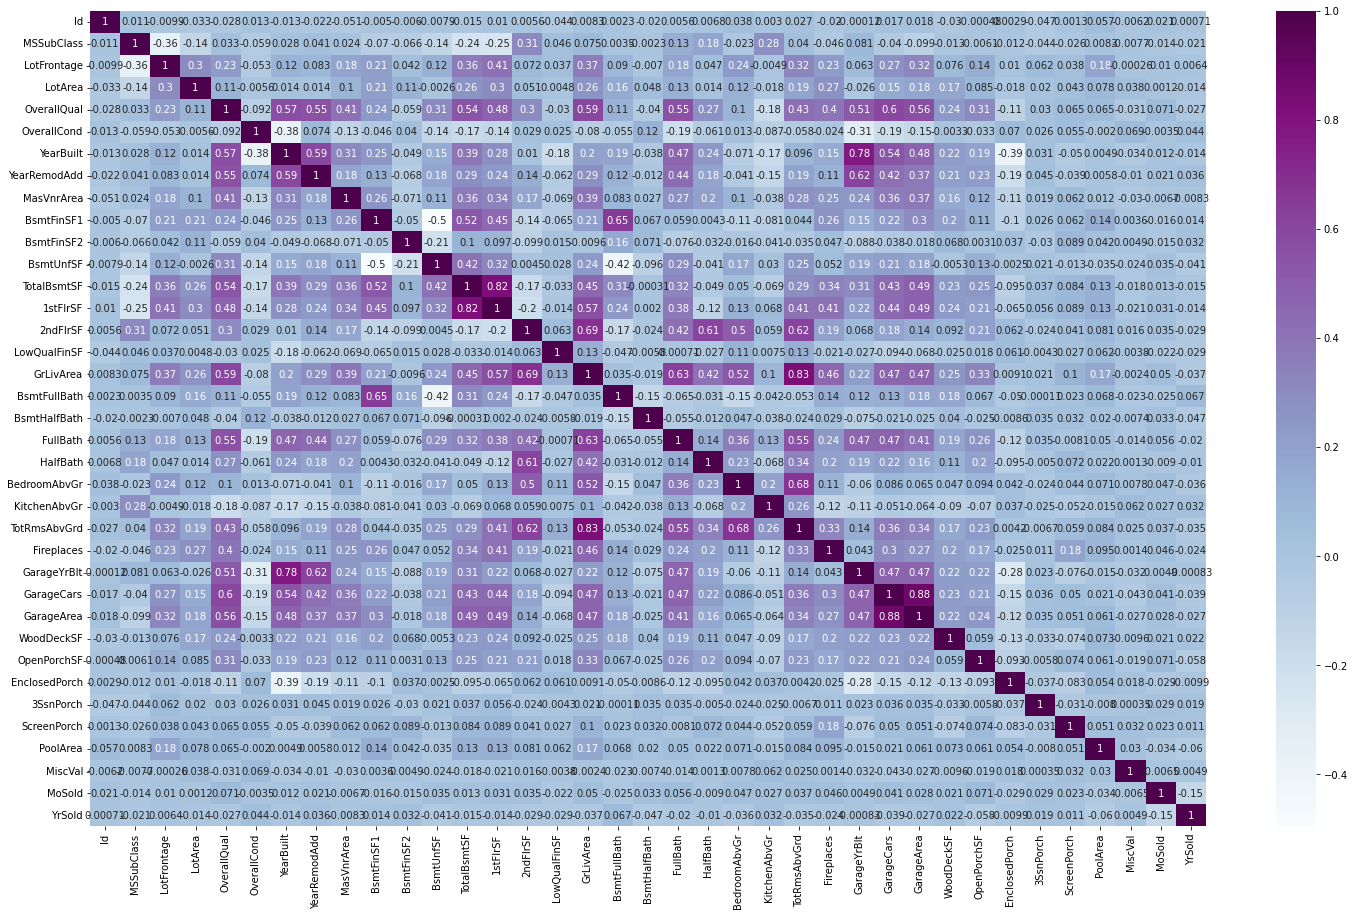

In [524]:
# Visualizamos la matriz de correlacion
plt.figure(figsize=(25,15))
sns.heatmap(data1.drop('SalePrice',axis=1).corr(),cmap="BuPu",annot=True)
plt.show()

2 . outliers

In [525]:
# Primero obtendremos la columnas segun su tipo
cols_numericas = [colname for colname in data1.columns if data1[colname].dtype in ['int64', 'float64']]

cols_categoricas = [colname for colname in data1.columns if data1[colname].dtype in ['object']]

print(cols_numericas)
print(cols_categoricas)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', '

c:\Users\54266\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\54266\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\54266\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

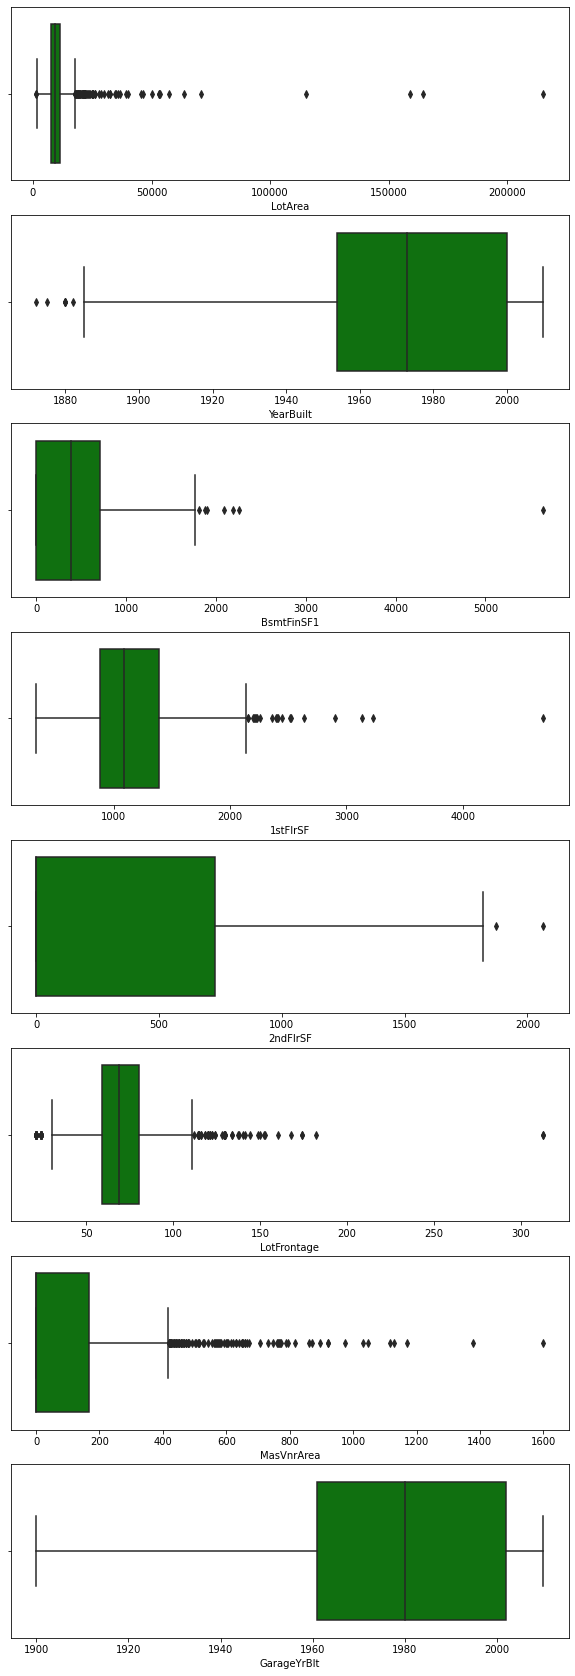

In [526]:
# obtenemos las variables continuas
box= data1[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

# Hcemos un grafico de caja para hacer visibles los datos anomalos

plt.figure(figsize=(10,30),facecolor='white')
plotnumber=1
for c in box:
    ax=plt.subplot(8,1,plotnumber)
    sns.boxplot(data[c],color='green')
    plotnumber=plotnumber + 1 
plt.show()


In [527]:
data1.shape

(1460, 76)

In [528]:
# Comenzamos a desestimar los outliers
# filtramos los outliers superiores e inferiores usando el rango intercuartilico IQR
# Usamos el metodo query para poder filtrar cada outlier y lo haremos con cada columna continua
below =  data1['LotArea'].mean() - 3 * data1['LotArea'].std()
above = data1['LotArea'].mean() + 3 * data1['LotArea'].std()
data1.query("LotArea < @above & LotArea > @below", inplace=True)


In [529]:
# Filtramos outliers en la columna YearBuilt
below =  data1['YearBuilt'].mean() - 3 * data1['YearBuilt'].std()
above = data1['YearBuilt'].mean() + 3 * data1['YearBuilt'].std()
data1.query("YearBuilt < @above & YearBuilt > @below", inplace=True)

In [530]:
# Filtramos outliers en la columna BsmtFinSF1
below =  data1['BsmtFinSF1'].mean() - 3 * data1['BsmtFinSF1'].std()
above = data1['BsmtFinSF1'].mean() + 3 * data1['BsmtFinSF1'].std()
data1.query("BsmtFinSF1 < @above & BsmtFinSF1 > @below", inplace=True)

In [531]:
# Filtramos outliers en la columna LotFrontage
below =  data1['LotFrontage'].mean() - 3 * data1['LotFrontage'].std()
above = data1['LotFrontage'].mean() + 3 * data1['LotFrontage'].std()
data1.query("LotFrontage < @above & LotFrontage > @below", inplace=True)

In [532]:
# Filtramos outliers en la columna MasVnrArea
below =  data1['MasVnrArea'].mean() - 3 * data1['MasVnrArea'].std()
above = data1['MasVnrArea'].mean() + 3 * data1['MasVnrArea'].std()
data1.query("MasVnrArea < @above & MasVnrArea > @below", inplace=True)

In [533]:
# Filtramos outliers en la columna GarageYrBlt
below =  data1['GarageYrBlt'].mean() - 3 * data1['GarageYrBlt'].std()
above = data1['GarageYrBlt'].mean() + 3 * data1['GarageYrBlt'].std()
data1.query("GarageYrBlt < @above & GarageYrBlt > @below", inplace=True)

In [534]:
data1.shape

(1388, 76)

Datos categoricos a datos numericos

In [535]:
# Traemos los features categoricos
cols_categoricas

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [536]:
#Usamos label encoding de la librearia scikit-learn para la conversion de las variables categoricas a variables numericas

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for features in cols_categoricas:
    data1[features] = le.fit_transform(data1[features].astype(str))



Ya terminado el proceso de limpieza de datos.

## Modelo Predictivo

### Creando Modelo

Preparacion de los datos para usarlos en el modelo

In [537]:
# Importamos de la libreria y los modulos que vamos a usar 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
import math
from prettytable import PrettyTable


In [538]:
# Separamos los set de entrenamiento y prueba

X= data1.drop(['Id','SalePrice'],axis=1) ## todos los features para entrenamiento


y= data1['SalePrice']  ## variable a predecir

mc=MinMaxScaler()
scaled_x=mc.fit_transform(X)

# Hacemos un split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)



Entrenamos los modelos y despues los comparamos en cuanto score prediction

1 .Linear Regression

In [539]:
print('model training 0/3 (Creando modelo)') #Creamos nueestra variable
LReg = LinearRegression()

print('model training 1/3 (Adecuando modelo)') #Entrenamos el modelo
LReg.fit(X_train, y_train)

print('model training 2/3 (Entrenando modelo)') # Predecimos
LReg_y_pred = LReg.predict(X_test)

print('model training 3/3 done!           ')


model training 0/3 (Creando modelo)
model training 1/3 (Adecuando modelo)
model training 2/3 (Entrenando modelo)
model training 3/3 done!           


2. Random Forest

In [540]:
print('model training 0/3 (Creando modelo)')
RFRegr = RandomForestRegressor()

print('model training 1/3 (Adecuando modelo)')
RFRegr.fit(X_train, y_train)

print('model training 2/3 (Entrenando modelo)')
RFRegr_y_pred = RFRegr.predict(X_test)

print('model training 3/3 done!           ')

model training 0/3 (Creando modelo)
model training 1/3 (Adecuando modelo)
model training 2/3 (Entrenando modelo)
model training 3/3 done!           


3. Gradient Boosting

In [541]:
print('model training 0/3 (Creando modelo)')
GBRegr = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

print('model training 1/3 (Adecuando modelo)')
GBRegr.fit(X_train, y_train)

print('model training 2/3 (Entrenando modelo)')
GBRegr_y_pred = GBRegr.predict(X_test)

print('model training 3/3 done!           ')

model training 0/3 (Creando modelo)
model training 1/3 (Adecuando modelo)
model training 2/3 (Entrenando modelo)
model training 3/3 done!           


#### Evaluacion de modelos

Procedemos a hacer una evaluacion de los modelos para verificar su precision y si necesitamos adecuarlo para mejores resultados


In [542]:
# Hacemos una funcion para medir las metricas de nuestro modelo, nos servira para no repetir el proceso en demas pruebas
def model_evaluation(algorithem_name, X_Test, y_pred, y_true):
    
    # R2 and Adjasted R2
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1-(1-r2)*((len(X_Test)-1)/(len(X_Test)-X_Test.shape[1]-1))
    # MSLE and RMSLE
    msle = mean_squared_log_error(y_true, y_pred)
    rmsle = math.sqrt(msle)
    
    # Crea una tabla con los resultados de cada metrica
    x = PrettyTable()
    x.add_row(['R2', r2])
    x.add_row(['Adjusted R2', adj_r2])
    x.add_row(['MSLE',msle])
    x.add_row(['RMSLE', rmsle])
    x.title = algorithem_name
    print(x)

In [543]:
#y_true
model_evaluation('y True',X_Test=X_test, y_pred= y_test, y_true=y_test)

+-----------------------+
|         y True        |
+-------------+---------+
|   Field 1   | Field 2 |
+-------------+---------+
|      R2     |   1.0   |
| Adjusted R2 |   1.0   |
|     MSLE    |   0.0   |
|    RMSLE    |   0.0   |
+-------------+---------+


In [544]:
# Llamamos la funcion y hacemos la evaluacion 
model_evaluation('Linear Regression',X_Test=X_test, y_pred=LReg_y_pred, y_true=y_test)

+------------------------------------+
|         Linear Regression          |
+-------------+----------------------+
|   Field 1   |       Field 2        |
+-------------+----------------------+
|      R2     |  0.8928158113941141  |
| Adjusted R2 |  0.8696239109355306  |
|     MSLE    | 0.018998517189008694 |
|    RMSLE    | 0.13783510869516769  |
+-------------+----------------------+


In [545]:
# Evaluamos random Forest
model_evaluation('Random Forest',X_Test=X_test, y_pred=RFRegr_y_pred, y_true=y_test)

+------------------------------------+
|           Random Forest            |
+-------------+----------------------+
|   Field 1   |       Field 2        |
+-------------+----------------------+
|      R2     |  0.884649125011148   |
| Adjusted R2 |  0.8596901637562502  |
|     MSLE    | 0.017795417178944707 |
|    RMSLE    | 0.13339946468762423  |
+-------------+----------------------+


In [546]:
# Evaluamos nuestro algoritmo
model_evaluation('Gradient Boosting',X_Test=X_test, y_pred=GBRegr_y_pred, y_true=y_test)

+------------------------------------+
|         Gradient Boosting          |
+-------------+----------------------+
|   Field 1   |       Field 2        |
+-------------+----------------------+
|      R2     |  0.8925479542276479  |
| Adjusted R2 |  0.8692980963704723  |
|     MSLE    | 0.015052166132377056 |
|    RMSLE    | 0.12268726964268566  |
+-------------+----------------------+


## Testing 

Procedemos a probar nuestro modelo ya entrenado con el dataset provisto para testing. Consideraciones iniciales: debemos adecuar el nuevo dataset a las transformaciones que ya sufrio nuestro dataframe de entrenamiento, caso contrario el modelo no funcionara correctamente con la cantidad de features que le proveemos. Ejemplo: si entrenamos con 20 columnas debemos proveerle 20 columnas para la prediccion, sino nos retornara un error.

In [547]:
# Vamos a probar nuestros modelos con el 2do dataset provisto en el repositorio

test_houses = pd.read_csv('Housing Dreams\houses_test_raw.csv')
test_houses.shape

(1459, 80)

In [548]:
# Otro dato a tener en cuenta es que en el proceso de data cleaning desestimamos ciertas columnas por contener datos nulos
# debemos adecuar esa nueva dimensionalidad en el testing
test_houses.drop(['Id','Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)
test_houses.shape

(1459, 74)

In [549]:
#Label Encoding
for features in cols_categoricas:
    test_houses[features] = le.fit_transform(test_houses[features].astype(str))

In [550]:
# testing con gradient boosting, que fue el modelo con mejor score

prediction_test = GBRegr.predict(test_houses)


In [551]:
# Al ser un array de numpy, necesitamos transformarlo a una serie de pandas
prediction_test = pd.Series(prediction_test)

In [552]:
#Chequeamos la dimensionalidad
prediction_test.shape

(1459,)

In [553]:
test_houses.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [554]:
# Hacemos una concatenacion entre el dataset de prueba y nuestra prediccion
test_houses1 = test_houses.assign(Prediccion=prediction_test)
test_houses1.shape



(1459, 75)

In [555]:
# Chequeamos que la columna este bien agregada
test_houses1.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [556]:
# Exportamos tanto nuestra prediccion como data_test completo a formato CSV
prediction_test.to_csv('Housing Dreams/Prediction_housing.csv',index=False)
test_houses1.to_csv('Housing Dreams/Housin_con_Prediccion.csv',index=False)

Gracias por su tiempo, cualquier duda visita mi repositorio de Github aqui: https://github.com/FabricioBarrera/Hackathon/tree/main/Housing%20Dreams